## 신경망 구성

- `레이어(layer)`: 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- `모듈(module)`: 한 개 이상의 계층이 모여서 구성
- `모델(model)`: 한 개 이상의 모듈이 모여서 구성

In [1]:
import torch

### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html

In [2]:
import torch.nn as nn

nn.Linear 계층 예제

In [3]:
input = torch.randn(128, 20)   # 128 -> 20  입력

m = nn.Linear(20, 30)          # 20 -> 30
print(m)

output = m(input)              # 128 -> 30  출력 
print(output)
print(output.size())

Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.2118, -0.4263,  0.7078,  ..., -1.1423,  0.4975,  0.5508],
        [-1.3436,  0.2337, -0.2519,  ..., -0.2242,  0.2389,  0.3158],
        [ 0.8930,  2.6342, -0.5959,  ...,  0.2372, -0.2735, -0.8973],
        ...,
        [ 0.5030, -0.0150,  0.2203,  ..., -1.4486,  0.1142,  1.2657],
        [ 0.5169,  0.7496,  0.1172,  ...,  0.0579, -0.7826,  0.1557],
        [ 0.2624,  0.2183,  0.0525,  ..., -0.6483, -0.8865, -0.1486]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


`nn.Conv2d` 계층 예시

In [4]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [5]:
m = nn.Conv2d(16, 33, 3, stride=2)      # 16 -> 33
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))  
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(m)  

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [6]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [7]:
nn.Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [8]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

weight 확인

In [9]:
weight = layer.weight
weight.size()

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [10]:
weight = weight.detach().numpy()
weight.shape

(20, 1, 5, 5)

In [11]:
%matplotlib inline

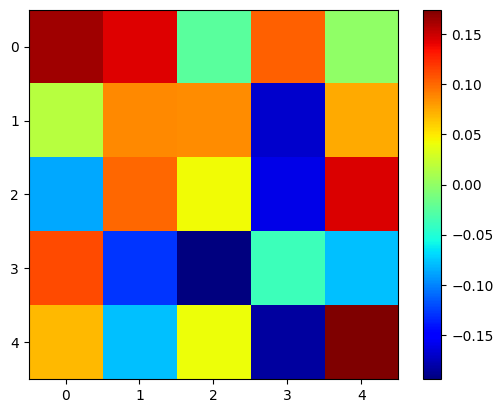

In [12]:
import matplotlib.pyplot as plt
plt.imshow(weight[0, 0, :, :], cmap='jet')
plt.colorbar()
plt.show()